# **Prepare Libraries**

In [104]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
import pandas as pd

# **Load the Dataset**

In [105]:
x = np.array([2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5, 3.3, 1.1, 8.9, 2.5, 1.9, 6.1, 7.4, 2.7, 4.8, 3.8, 6.9, 7.8])
y =  np.array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30, 24, 67, 69, 30, 54, 35, 76, 86])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print(len(X_train),len(y_train),len(X_test),len(y_test))

20 20 5 5


## **Scattering the data**

Text(0.5, 1.0, 'number of hours with score')

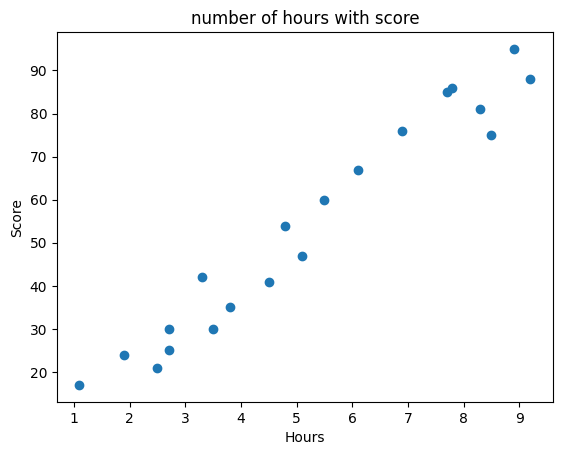

In [106]:
plt.scatter(X_train,y_train)
plt.xlabel('Hours')
plt.ylabel('Score')
plt.title("number of hours with score")

In [107]:
def standerdization(x):
  X = zscore(x)
  return X

In [108]:
X_train = standerdization(X_train)
X_test = standerdization(X_test)
y_test = standerdization(y_test)
y_train = standerdization(y_train)
print(len(X_train),len(y_train),len(X_test),len(y_test))

20 20 5 5


Text(0.5, 1.0, 'Number of hours with score after standerdization')

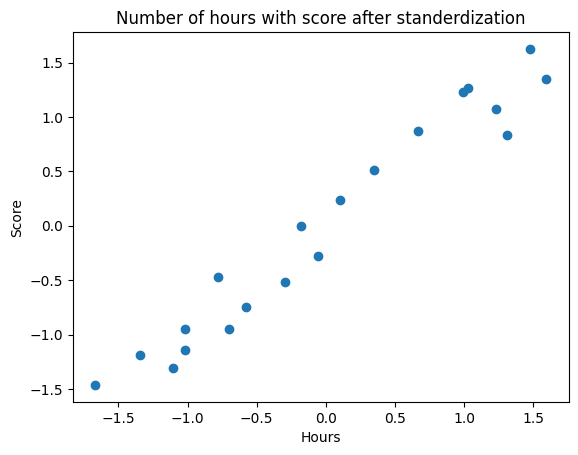

In [109]:
plt.scatter(X_train,y_train)
plt.xlabel('Hours')
plt.ylabel('Score')
plt.title("Number of hours with score after standerdization")

# Calculate Cost

In [110]:
def MSE_Cost(y_pred, y):
  return np.mean((y_pred - y)**2)

# Gradient Descent Optimizer

In [111]:
def GradientDescent(ypred, y, alpha, w, b, x):
  d_w = 0.0
  d_b = 0.0
  d_w = np.dot((ypred - y),x) / 25
  d_b = np.mean(ypred - y)
  w -= alpha* d_w
  b -= alpha* d_b
  return w,b

#Predict the score

In [112]:
def predict(x):
  return x * w + b

#Traning the Model

In [122]:
w = random.random()
b = random.random()
alpha = 0.1
costHist = []
for i in range(100):
  z = w * X_train + b
  w,b = GradientDescent(z, y_train, alpha, w, b, X_train)

  cost = MSE_Cost(z, y_train)
  costHist.append(cost)

  if(i % 5 == 0):
    print("Iteration" , i, "cost = " , cost)


Iteration 0 cost =  0.5792101555991065
Iteration 5 cost =  0.2340623506666038
Iteration 10 cost =  0.11340655630394117
Iteration 15 cost =  0.07120173651701425
Iteration 20 cost =  0.056427293847627055
Iteration 25 cost =  0.051250338624779554
Iteration 30 cost =  0.04943420136632819
Iteration 35 cost =  0.04879615581902096
Iteration 40 cost =  0.04857159905300525
Iteration 45 cost =  0.04849239566726025
Iteration 50 cost =  0.04846438590984728
Iteration 55 cost =  0.04845444869048886
Iteration 60 cost =  0.04845090959374511
Iteration 65 cost =  0.048449643354260885
Iteration 70 cost =  0.04844918784231732
Iteration 75 cost =  0.04844902293301806
Iteration 80 cost =  0.048448962790704486
Iteration 85 cost =  0.048448940672723706
Iteration 90 cost =  0.048448932462133595
Iteration 95 cost =  0.04844892938272343


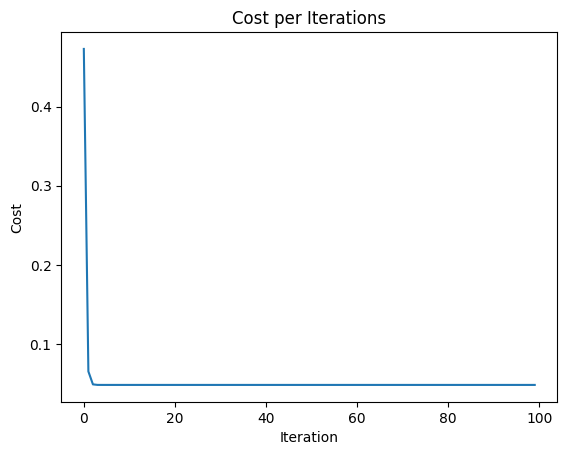

In [114]:
plt.plot(range(100), costHist)
plt.title("Cost per Iterations")
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.show()

[]

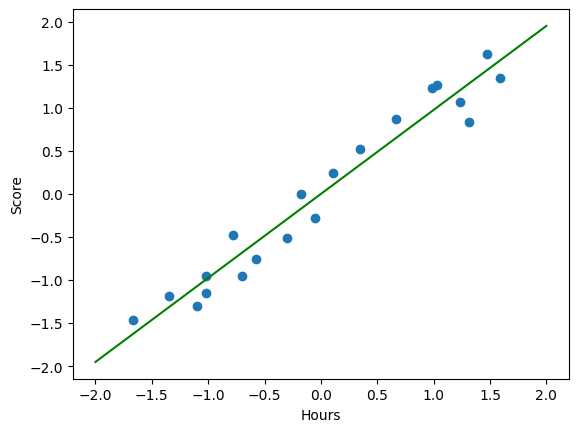

In [123]:
x1, y1 = -2, (w * -2 + b)
x2, y2 = 2, (w * 2 + b)
plt.plot([x1, x2], [y1, y2], c='g')
plt.scatter(X_train,y_train)
plt.xlabel('Hours')
plt.ylabel('Score')
plt.plot()

## **Testing**

5
5
     Actual  Predicted
0 -1.085112  -1.151366
1 -0.733455  -0.398537
2  1.376485   1.461392
3 -0.582745  -0.708525
4  1.024828   0.797132
0.03828705533538258


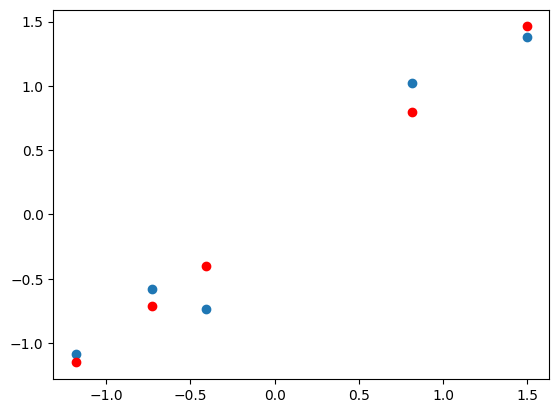

In [124]:
y_pred = np.dot(w, X_test) + b
print(len(y_pred))
print(len(y_test))
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)
print(MSE_Cost(y_pred, y_test))
plt.scatter(X_test,y_test)
plt.scatter(X_test,y_pred, c='r')

In [ ]:
a = 5.9 - np.mean(x) / np.std(x)
pred = predict(a)
print(pred)
print(w)
print(b)